In [22]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from gensim. corpora import Dictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from gensim.models import Phrases
import re
from datetime import datetime
from sklearn.model_selection import train_test_split

In [43]:
#reads ethnicity spread csv and cleans it
df = pd.read_csv("ethnicitySpreadPerCollege.csv")

#only saves columns relating to name of college, state located, percentages of racial percentages, and year the data was taken
columns = ['INSTNM','CITY', 'STABBR', 'UGDS_WHITE', 'UGDS_BLACK','UGDS_HISP', 'UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI', 'UGDS_2MOR', 'year', 'CONTROL','TUITIONFEE_OUT']
rdf = df[columns]
rdf = rdf.dropna(how='any')
rdf = rdf.loc[~(rdf[columns[2:8]]==0).all(axis=1)] #if every column for racial percentage equals 0 then it is dropped 
display(rdf)
"""
INSTNM = College/University Name
CITY = city
STABBR = State
UGDS_WHITE = White population
UGDS_hispanic = hispanic population
UGDS_HISP = Hispanic population
UGDS_ASIAN = Asian population
UGDS_AIAN = American Indian/Alaskan population
UGDS_NHPI = Hawaiin/Pacific Islander population
UGDS_2MOR = Multiethnic population
year = Year data was taken
CONTROL = Whether the college/univeristy is public, private nonprofit or private for profit
"""

C:\Users\atori\AppData\Local\Temp\ipykernel_24580\3655950188.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ethnicitySpreadPerCollege.csv")


,INSTNM,CITY,STABBR,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,year,CONTROL,TUITIONFEE_IN,TUITIONFEE_OUT
21120,Alabama A & M University,Normal,AL,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2008,Public,4072.0,7304.0
21121,University of Alabama at Birmingham,Birmingham,AL,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2008,Public,4664.0,10352.0
21122,University of Alabama in Huntsville,Huntsville,AL,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2008,Public,5952.0,13092.0
21123,Alabama State University,Montgomery,AL,0.0133,0.9776,0.0034,0.0002,0.0006,0.0000,0.0000,2008,Public,5460.0,10068.0
21124,The University of Alabama,Tuscaloosa,AL,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2008,Public,6400.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57952,Herzing University-Tampa,Tampa,FL,0.2647,0.3824,0.2353,0.0147,0.0000,0.0000,0.0147,2022,Private nonprofit,14200.0,14200.0
57953,Abilene Christian University-Undergraduate Online,Addison,TX,0.3542,0.2361,0.3012,0.0096,0.0048,0.0024,0.0337,2022,Private nonprofit,14520.0,14520.0
57954,Great Northern University,Spokane,WA,0.8400,0.0400,0.0000,0.0000,0.0000,0.0000,0.0400,2022,Private nonprofit,15600.0,15600.0
57955,Arizona College of Nursing-Salt Lake City,Murray,UT,0.6720,0.0591,0.1667,0.0161,0.0000,0.0215,0.0645,2022,Private for-profit,20826.0,20826.0


66064.0


Mean amount of white students: 0.5168780261969286 . And std white students:  0.29837000388128854
Mean amount of black students: 0.12504613498515937 . And std black students:  0.17943269760390243
Mean amount of hispanic students: 0.11001750548457864 . And std hispanic students:  0.17190576137913102
Mean amount of hispanic students: 0.03542156729900632 . And std hispanic students:  0.05869564971205723
Mean amount of American Indian/Alaskan population students: 0.007008030068395923 . And std American Indian/Alaskan population students:  0.03521872833219366
Mean amount of Multiethnic population students: 0.0249413924377339 . And std Multiethnic population students:  0.026916150475662995


Text(0.5, 1.0, 'Occurences of Percentages of Multiethnic population Students at Colleges Across the US from 2008 - 2022')

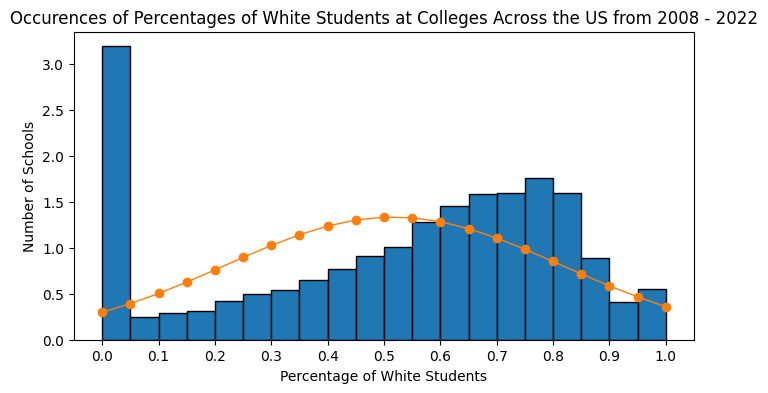

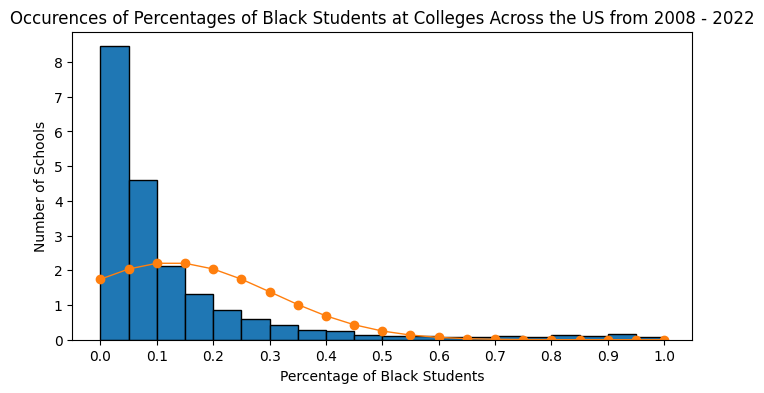

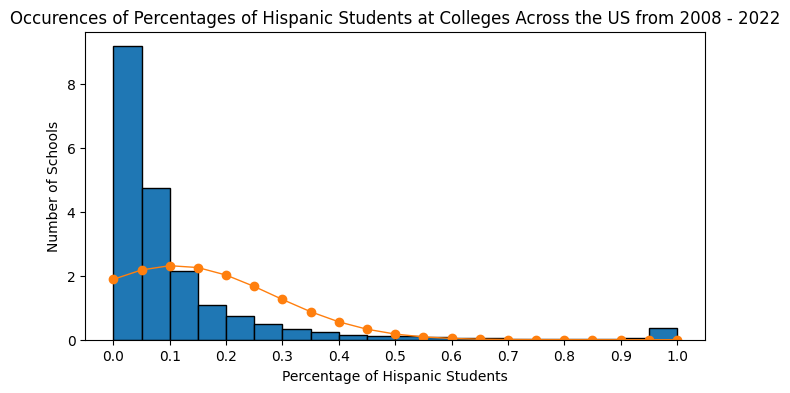

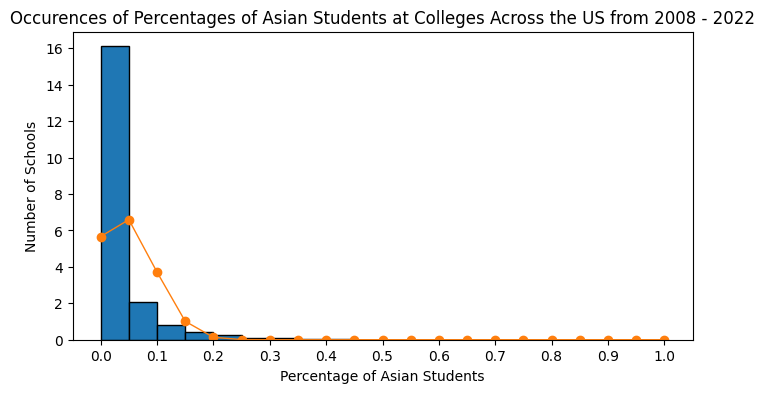

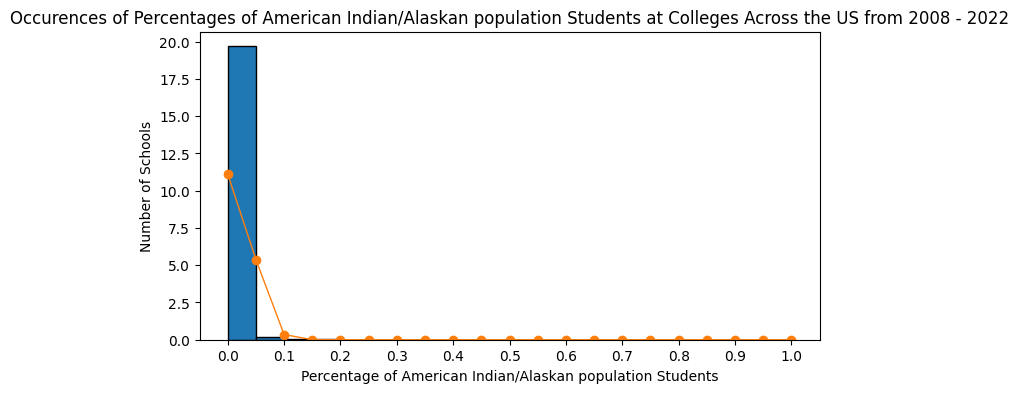

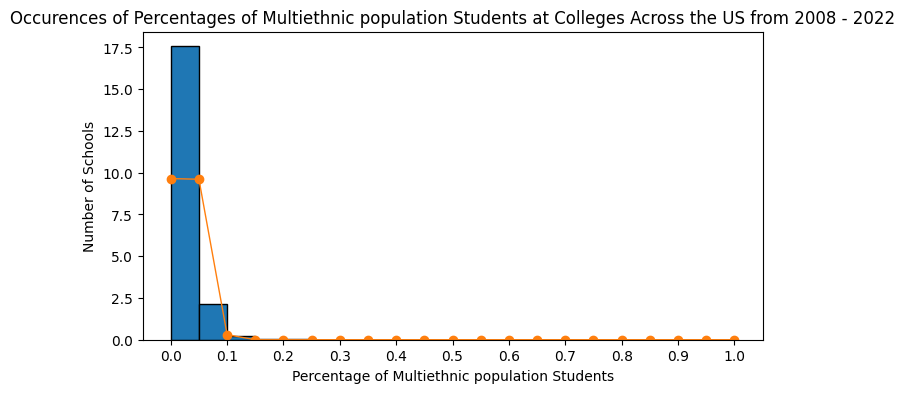

In [24]:
#creates graphs to show how often different percentages of races at colleges appear and gives a line that shows the normal distribution of the each value

#determines the size of the bins for the histogram to be from 0 to .8 in intervals of .05
size_bins = np.arange(0,1.01,.05)


#White Student Stats and Visualization
#mean and std
meanWhiteStudentSize = rdf['UGDS_WHITE'].mean()
stdWhiteStudentSize = rdf['UGDS_WHITE'].std(ddof=1)
print("Mean amount of white students:", meanWhiteStudentSize, ". And std white students: ", stdWhiteStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanWhiteStudentSize, stdWhiteStudentSize))
xs = size_bins

#creates histogram and line of normal distributio
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_WHITE'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of White Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of White Students at Colleges Across the US from 2008 - 2022')


#Black Student Stats and Visualization
#mean and std
meanBlackStudentSize = rdf['UGDS_BLACK'].mean()
stdBlackStudentSize = rdf['UGDS_BLACK'].std(ddof=1)
print("Mean amount of black students:", meanBlackStudentSize, ". And std black students: ", stdBlackStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanBlackStudentSize, stdBlackStudentSize))
xs = size_bins

#creates histogram and line of normal distributio
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_BLACK'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of Black Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of Black Students at Colleges Across the US from 2008 - 2022')


#hispanic Student Stats and Visualization
#mean and std
meanHispanicStudentSize = rdf['UGDS_HISP'].mean()
stdHIspanicStudentSize = rdf['UGDS_HISP'].std(ddof=1)
print("Mean amount of hispanic students:", meanHispanicStudentSize, ". And std hispanic students: ", stdHIspanicStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanHispanicStudentSize, stdHIspanicStudentSize))
xs = size_bins

#creates histogram and line of normal distribution
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_HISP'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of Hispanic Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of Hispanic Students at Colleges Across the US from 2008 - 2022')


#Asian Student Stats and Visualization
#mean and std
meanAsianStudentSize = rdf['UGDS_ASIAN'].mean()
stdAsianStudentSize = rdf['UGDS_ASIAN'].std(ddof=1)
print("Mean amount of hispanic students:", meanAsianStudentSize, ". And std hispanic students: ", stdAsianStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanAsianStudentSize, stdAsianStudentSize))
xs = size_bins

#creates histogram and line of normal distribution
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_ASIAN'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of Asian Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of Asian Students at Colleges Across the US from 2008 - 2022')


#American Indian/Alaskan population Student Stats and Visualization
#mean and std
meanAmericanIndianStudentSize = rdf['UGDS_AIAN'].mean()
stdAmericanIndianStudentSize = rdf['UGDS_AIAN'].std(ddof=1)
print("Mean amount of American Indian/Alaskan population students:", meanAmericanIndianStudentSize, ". And std American Indian/Alaskan population students: ", stdAmericanIndianStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanAmericanIndianStudentSize, stdAmericanIndianStudentSize))
xs = size_bins

#creates histogram and line of normal distribution
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_AIAN'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of American Indian/Alaskan population Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of American Indian/Alaskan population Students at Colleges Across the US from 2008 - 2022')


#Multiethnic population Student Stats and Visualization
#mean and std
meanMultiethnicStudentSize = rdf['UGDS_2MOR'].mean()
stdMultiethnicStudentSize = rdf['UGDS_2MOR'].std(ddof=1)
print("Mean amount of Multiethnic population students:", meanMultiethnicStudentSize, ". And std Multiethnic population students: ", stdMultiethnicStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanMultiethnicStudentSize, stdMultiethnicStudentSize))
xs = size_bins

#creates histogram and line of normal distribution
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_2MOR'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of Multiethnic population Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of Multiethnic population Students at Colleges Across the US from 2008 - 2022')

In [51]:
#Finds the cosine similarity to the phrase "Only White People" across all posts in college.csv


#function that finds vector representation for each token
def get_vector(bow,dct):
    vector_len = len(dct.token2id)
    vector = np.zeros(vector_len)
    for tk in bow:
        vector[tk[0]] = tk[1]
    vector = vector/sum(vector)
    return vector

#finds the cosine similairty between two different sentences or phrases
def cosine_sim(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))


#reads the csv created from the posts webscraped from the college subreddit
df = pd.read_csv("college.csv")
df['timestamp'] = df['created_utc'].apply(lambda epoch:datetime.fromtimestamp(epoch)) #converts created utc to datetime format
df = df.sort_values(by='created_utc') #sorts dataframe based on earliest posts first
df=df.reset_index(drop=True)

#converts text to tokens, bow, and finds vector representation and cosine similarity
df['text'] = df['text'].apply(str.lower)
#remove @s, #s, urls, and rt
df['tokens'] = df['text'].apply(lambda txt: re.sub(r'@\w+|#\w+|http.+|rt\s', '', txt))
#tokenizes the words
df['tokens'] = df['tokens'].apply(word_tokenize)

#find phrases that have been used 30 or more times
phraser = Phrases(df['tokens'], min_count=30, delimiter='_')
df['tokens'] = df['tokens'].apply(lambda tokens:phraser[tokens])

#gets rid of stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])

#keeps words tokenized if they are longer than 3 letters
df['tokens'] = df['tokens'].apply(lambda tokens: [t for t in tokens if len(t) > 3])

#stems the token words
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(tk) for tk in tokens])

#gensim dictionary and filters out words that appear less than twenty times
dct = Dictionary(df['tokens'])
dct.filter_extremes(no_below=20) 

#creates bow column from the dictionary and rows with three or more bow
df['bow'] = df['tokens'].apply(dct.doc2bow)
df = df.loc[df['bow'].apply(lambda bow: len(bow) >= 3)]

#creates vector representation for each index in the bag of words
df['vector'] = df['bow'].apply(lambda bow: get_vector(bow, dct))


#searches for cosine similarity

search = 'Only white people.'#sentence that will be searched throughout for cosine similarity
#turns the phrases into bow which is searched with previous dictionary to find vector
search = word_tokenize(search)
stop_words = set(stopwords.words('english'))
search = [s for s in search if s not in stop_words]
search = [s for s in search if len(s) >= 3]
search = [stemmer.stem(s) for s in search]
bow = dct.doc2bow(search)
vector = get_vector(bow, dct)

#finds vector representation for words that weren't filtered out in cdf dataframe
df['vector'] = df['bow'].apply(lambda bow: get_vector(bow, dct))

#iterates through cdf and finds cosine similarity with the phrase and text from posts still left
for index,row in df.iterrows():
    df.at[index, 'cossim'] = cosine_sim(row['vector'], vector)
#sorts based on highest cossim values and gets rid of one with 0
cdf_result = df.sort_values(by='cossim', ascending=False)
cdf_result = cdf_result.loc[cdf_result['cossim']>0]

#saves each line post that has cossim to the phrase
cdf_result = cdf_result[['text', 'cossim']]
cdf_result.to_csv("racialDisparityCossim.csv") 

print("The percentage of posts that share a similairty with the phrase 'Only white people':", len(cdf_result)/len(df))

The percentage of posts that share a similairty with the phrase 'Only white people': 0.14672511603919547


In [50]:
#creates a naive bayes model to predict the price tier of a college in the United States based on the year, state, CONTROL, and diversity

#puts each tutiion price into a tier
def priceTiers(series):
    series2 = []
    if series <= 12500:
        series2.append('tier1')
    elif series > 12500 and series <= 25000:
        series2.append('tier2')
    elif series > 25000 and series <= 37500:
        series2.append('tier3')
    elif series > 37500:
        series2.append('tier4')
    return pd.Series(series2)

ndf = rdf.copy()
ndf['tier'] = rdf['TUITIONFEE_OUT'].apply(priceTiers)   


fdf = rdf[['STABBR', 'CITY', 'UGDS_WHITE', 'UGDS_BLACK','UGDS_HISP', 'UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI', 'UGDS_2MOR', 'year', 'CONTROL']] #didn't include cost to show how these factors solely affect the price tier
ldf = ndf['tier'] #tiers for each row

X_train, X_test, Y_train, Y_test = train_test_split(fdf, ldf, test_size=0.2) #train test split for the two dataframes

#training a NB (Naive Bayes) method
model = {}
classes = Y_train.unique()
for cls in classes:
    ids = Y_train.loc[Y_train == cls].index
    sdf = X_train.loc[ids]
    model[cls] = {'segmentation': len(sdf)/len(X_train)}
    state_prob = sdf.groupby(by='STABBR')['STABBR'].count()/len(sdf)
    city_prob = sdf.groupby(by='CITY')['CITY'].count()/len(sdf)
    tuple_of_white_mean_std = (sdf['UGDS_WHITE'].mean(), sdf['UGDS_WHITE'].std(ddof=1))
    tuple_of_black_mean_std = (sdf['UGDS_BLACK'].mean(), sdf['UGDS_BLACK'].std(ddof=1))
    tuple_of_hisp_mean_std = (sdf['UGDS_HISP'].mean(), sdf['UGDS_HISP'].std(ddof=1))
    tuple_of_asian_mean_std = (sdf['UGDS_ASIAN'].mean(), sdf['UGDS_ASIAN'].std(ddof=1))
    tuple_of_aian_mean_std = (sdf['UGDS_AIAN'].mean(), sdf['UGDS_AIAN'].std(ddof=1))
    tuple_of_nhpi_mean_std = (sdf['UGDS_NHPI'].mean(), sdf['UGDS_NHPI'].std(ddof=1))
    tuple_of_2mor_mean_std = (sdf['UGDS_2MOR'].mean(), sdf['UGDS_2MOR'].std(ddof=1))
    year_prob = sdf.groupby(by='year')['year'].count()/len(sdf)
    control_prob = sdf.groupby(by='CONTROL')['CONTROL'].count()/len(sdf)
    model[cls]['STABBR'] = state_prob
    model[cls]['CITY'] = city_prob
    model[cls]['UGDS_WHITE'] = tuple_of_white_mean_std
    model[cls]['UGDS_BLACK'] = tuple_of_white_mean_std
    model[cls]['UGDS_HISP'] = tuple_of_white_mean_std
    model[cls]['UGDS_ASIAN'] = tuple_of_white_mean_std
    model[cls]['UGDS_AIAN'] = tuple_of_white_mean_std
    model[cls]['UGDS_NHPI'] = tuple_of_white_mean_std
    model[cls]['UGDS_2MOR'] = tuple_of_white_mean_std
    model[cls]['year'] = year_prob
    model[cls]['CONTROL'] = control_prob


#finds the accuracy of the naive bayes method created above from the train test split
correct=0
for idx, test in X_test.iterrows():
    probs =[]
    for cls in model:
        prob_vals = model[cls]

        if test['STABBR'] in prob_vals['STABBR']:
            state_prob = prob_vals['STABBR'][test['STABBR']]
        else:
            state_prob = prob_vals['STABBR'].min()

        if test['CITY'] in prob_vals['CITY']:
            city_prob = prob_vals['CITY'][test['CITY']]
        else:
            city_prob = prob_vals['CITY'].min()

        white_prob = norm.pdf(test['UGDS_WHITE'], prob_vals['UGDS_WHITE'][0], prob_vals['UGDS_WHITE'][1])
        black_prob = norm.pdf(test['UGDS_BLACK'], prob_vals['UGDS_BLACK'][0], prob_vals['UGDS_BLACK'][1])
        hisp_prob = norm.pdf(test['UGDS_HISP'], prob_vals['UGDS_HISP'][0], prob_vals['UGDS_HISP'][1])
        asian_prob = norm.pdf(test['UGDS_ASIAN'], prob_vals['UGDS_ASIAN'][0], prob_vals['UGDS_ASIAN'][1])
        aian_prob = norm.pdf(test['UGDS_AIAN'], prob_vals['UGDS_AIAN'][0], prob_vals['UGDS_AIAN'][1])
        nhpi_prob = norm.pdf(test['UGDS_NHPI'], prob_vals['UGDS_NHPI'][0], prob_vals['UGDS_NHPI'][1])
        mor2_prob = norm.pdf(test['UGDS_2MOR'], prob_vals['UGDS_2MOR'][0], prob_vals['UGDS_2MOR'][1])
        
        if test['year'] in prob_vals['year']:
            year_prob = prob_vals['year'][test['year']]
        else:
            year_prob = prob_vals['year'].min()
        if test['CONTROL'] in prob_vals['CONTROL']:
            control_prob = prob_vals['CONTROL'][test['CONTROL']]
        else:
            control_prob = prob_vals['CONTROL'].min()
        total_prob = state_prob * city_prob * white_prob * black_prob * hisp_prob * asian_prob * aian_prob * nhpi_prob * mor2_prob * year_prob * control_prob * prob_vals['segmentation']
        probs.append([cls, total_prob])
    probs = sorted(probs, key= lambda pb: pb[1], reverse= True)
    if probs[0][0] == Y_test[idx]:
        correct+= 1
print("How many correct", correct, "out of", len(X_test), "resulting in a percentage of", correct/len(X_test))



#function to predict naive bayes method to check the values for 
def naive_bayes_predict (model, test):
    probs =[]
    for cls in model:
        prob_vals = model[cls]

        if test['STABBR'] in prob_vals['STABBR']:
            state_prob = prob_vals['STABBR'][test['STABBR']]
        else:
            state_prob = prob_vals['STABBR'].min()

        if test['CITY'] in prob_vals['CITY']:
            city_prob = prob_vals['CITY'][test['CITY']]
        else:
            city_prob = prob_vals['CITY'].min()

        white_prob = norm.pdf(test['UGDS_WHITE'], prob_vals['UGDS_WHITE'][0], prob_vals['UGDS_WHITE'][1])
        black_prob = norm.pdf(test['UGDS_BLACK'], prob_vals['UGDS_BLACK'][0], prob_vals['UGDS_BLACK'][1])
        hisp_prob = norm.pdf(test['UGDS_HISP'], prob_vals['UGDS_HISP'][0], prob_vals['UGDS_HISP'][1])
        asian_prob = norm.pdf(test['UGDS_ASIAN'], prob_vals['UGDS_ASIAN'][0], prob_vals['UGDS_ASIAN'][1])
        aian_prob = norm.pdf(test['UGDS_AIAN'], prob_vals['UGDS_AIAN'][0], prob_vals['UGDS_AIAN'][1])
        nhpi_prob = norm.pdf(test['UGDS_NHPI'], prob_vals['UGDS_NHPI'][0], prob_vals['UGDS_NHPI'][1])
        mor2_prob = norm.pdf(test['UGDS_2MOR'], prob_vals['UGDS_2MOR'][0], prob_vals['UGDS_2MOR'][1])
        
        if test['year'] in prob_vals['year']:
            year_prob = prob_vals['year'][test['year']]
        else:
            year_prob = prob_vals['year'].min()
        if test['CONTROL'] in prob_vals['CONTROL']:
            control_prob = prob_vals['CONTROL'][test['CONTROL']]
        else:
            control_prob = prob_vals['CONTROL'].min()


        total_prob = state_prob * city_prob * white_prob * black_prob * hisp_prob * asian_prob * aian_prob * nhpi_prob * mor2_prob * year_prob * control_prob * prob_vals['segmentation']
        probs.append([cls, total_prob])
    probs = sorted(probs, key= lambda pb: pb[1], reverse= True)
    return probs[0][0]


#uses the naive bayes method to see the predicted price tier of the following outcomes
#majority white people with some diveristy
test = pd.Series({'STABBR': 'TX', 'CITY': 'Houston', 'UGDS_WHITE': .5, 'UGDS_BLACK': .3, 'UGDS_HISP': 0, 'UGDS_ASIAN': .1, 'UGDS_AIAN': 0, 'UGDS_NHPI': 0, 'UGDS_2MOR': .1, 'year': 2018, 'CONTROL': 'Public'})
cls = naive_bayes_predict(model, test)
print("Likely price tier for a public school in Houston, Texas in 2018 that is made up of 50% white students, 30% black students, 10% asian students, and 10% biracial students:", cls)

#much more diverse
test = pd.Series({'STABBR': 'AL', 'CITY': 'Huntsville', 'UGDS_WHITE': .1, 'UGDS_BLACK': .6, 'UGDS_HISP': .05, 'UGDS_ASIAN': .3, 'UGDS_AIAN': .05, 'UGDS_NHPI': 0, 'UGDS_2MOR': 0, 'year': 2020, 'CONTROL': 'Private nonprofit'})
cls = naive_bayes_predict(model, test)
print("Likely price tier for a private nonprofit school in Huntsville, Alabama in 2020 that is made up of 10% white students, 60% black students, 5% hispanic students, 5% asian students, and 5% native american students:", cls)

#little diveristy wit high majority of white people
test = pd.Series({'STABBR': 'TN', 'CITY': 'Milligan', 'UGDS_WHITE': .9, 'UGDS_BLACK': .1, 'UGDS_HISP': 0, 'UGDS_ASIAN': 0, 'UGDS_AIAN': 0, 'UGDS_NHPI': 0, 'UGDS_2MOR': 0, 'year': 2022, 'CONTROL': 'Private for-profit'})
cls = naive_bayes_predict(model, test)
print("Likely price tier for a private for profit school in Milligan, Tennessee in 2022 that is made up of 90% white students, and 10% black students:", cls)

#very high diversity
test = pd.Series({'STABBR': 'CA', 'CITY': 'Los Angeles', 'UGDS_WHITE': .1, 'UGDS_BLACK': .5, 'UGDS_HISP': .3, 'UGDS_ASIAN': .1, 'UGDS_AIAN': 0, 'UGDS_NHPI': 0, 'UGDS_2MOR': 0, 'year': 2022, 'CONTROL': 'Private for-profit'})
cls = naive_bayes_predict(model, test)
print("Likely price tier for a private for profit school in Log Angeles, California in 2022 that is made up of 10% white students, 50% black students, 30% hispanic students, and 10% asian students:", cls)

3011 6200 0.4856451612903226
Likely price tier for a public school in Houston, Texas in 2018 that is made up of 50% white students, 30% black students, 10% asian students, and 10% biracial students: tier2
Likely price tier for a private nonprofit school in Huntsville, Alabama in 2020 that is made up of 10% white students, 60% black students, 5% hispanic students, 5% asian students, and 5% native american students: tier2
Likely price tier for a private for profit school in Milligan, Tennessee in 2022 that is made up of 90% white students, and 10% black students: tier1
Likely price tier for a private for profit school in Log Angeles, California in 2022 that is made up of 10% white students, 50% black students, 30% hispanic students, and 10% asian students: tier2
